Import packages to use

In [54]:
# -*- coding: utf-8 -*-
"""
Algorithm for Stock Trading Using Simple Moving Averages

@author: Shanta
"""
# Import necessary libraries
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web

Determine what stock data to use and setup algorithm to analyze stock price movement

In [55]:
# Set moving average times to focus on - these are shorter term swings technicals
ma_1 = 9
ma_2 = 21

# Establish date range to focus on - 2 years for newer stock
start = dt.datetime.now() - dt.timedelta(days=365*2)
end = dt.datetime.now()

# Scrape data off yahoo API using specified ticker and time range
data = web.DataReader('NIO', 'yahoo', start, end)

# Add rolling average calculations to dataframe according to SMA lengths
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()
# Date begins after second time to allow for moving average calculations
data = data.iloc[ma_2:]
data

,High,Low,Open,Close,Volume,Adj Close,SMA_9,SMA_21
Date,,,,,,,,
2020-05-06,3.650000,3.450000,3.590000,3.620000,54347800,3.620000,3.328889,3.146190
2020-05-07,3.670000,3.520000,3.630000,3.630000,26736700,3.630000,3.405556,3.190476
2020-05-08,3.800000,3.600000,3.680000,3.770000,27638000,3.770000,3.464444,3.239524
2020-05-11,3.770000,3.660000,3.720000,3.740000,16585600,3.740000,3.508889,3.290476
2020-05-12,3.780000,3.610000,3.740000,3.620000,21943800,3.620000,3.510000,3.321429
...,...,...,...,...,...,...,...,...
2022-03-29,21.959999,21.020000,21.580000,21.879999,65946100,21.879999,20.951111,19.457143
2022-03-30,23.860001,21.629999,21.830000,22.170000,114646500,22.170000,21.323333,19.471429
2022-03-31,22.280001,20.760000,22.280001,21.049999,77641400,21.049999,21.344444,19.437143


In [56]:
# Create lists to track buys, sells, profit, set trigger to guide buy/sells
buy_signals = []
sell_signals = []
profit= [0]
trigger = 0

Iterate through each day and either buy or sell according to "Adjusted Close"; profits are also tracked

In [57]:
# Loop through each day to determine buy/sell/hold position; add to profit total
# Trigger used to identify holding periods - no buys and/or sells 
# A buy subtracts from the profit list and a sell adds to it
# Need to add a way to remove a "hold" position from affecting profits

for x in range(len(data)):
    if data[f'SMA_{ma_1}'].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
        buy_signals.append(data['Adj Close'].iloc[x])
        sell_signals.append(float('NaN'))
        profit[0] = profit[0] - data['Adj Close'].iloc[x]
        trigger = 1
    elif data[f'SMA_{ma_1}'].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
         buy_signals.append(float('NaN'))
         sell_signals.append(data['Adj Close'].iloc[x])
         profit[0] = profit[0] + data['Adj Close'].iloc[x]
         trigger = -1
    else: 
        buy_signals.append(float('NaN'))
        sell_signals.append(float('NaN'))

data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals
data

,High,Low,Open,Close,Volume,Adj Close,SMA_9,SMA_21,Buy Signals,Sell Signals
Date,,,,,,,,,,
2020-05-06,3.650000,3.450000,3.590000,3.620000,54347800,3.620000,3.328889,3.146190,3.62,NaN
2020-05-07,3.670000,3.520000,3.630000,3.630000,26736700,3.630000,3.405556,3.190476,NaN,NaN
2020-05-08,3.800000,3.600000,3.680000,3.770000,27638000,3.770000,3.464444,3.239524,NaN,NaN
2020-05-11,3.770000,3.660000,3.720000,3.740000,16585600,3.740000,3.508889,3.290476,NaN,NaN
2020-05-12,3.780000,3.610000,3.740000,3.620000,21943800,3.620000,3.510000,3.321429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-29,21.959999,21.020000,21.580000,21.879999,65946100,21.879999,20.951111,19.457143,NaN,NaN
2022-03-30,23.860001,21.629999,21.830000,22.170000,114646500,22.170000,21.323333,19.471429,NaN,NaN
2022-03-31,22.280001,20.760000,22.280001,21.049999,77641400,21.049999,21.344444,19.437143,NaN,NaN


Visualize Stock Data from previous 2 years with Moving Average lines and buy/sell signals

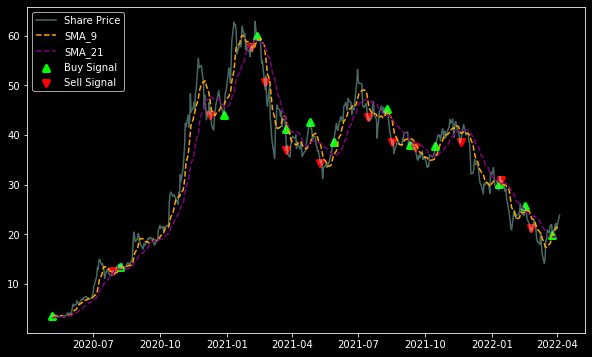

Profit from this strategy is: $ 7.11


In [58]:
# Visualize price movement with signals
plt.style.use("dark_background")
# Share price is in gray, moving averages lines are colored
plt.plot(data['Adj Close'], label="Share Price", alpha = 0.5)
plt.plot(data[f'SMA_{ma_1}'], label=f"SMA_{ma_1}", color="orange", linestyle ="--")
plt.plot(data[f'SMA_{ma_2}'], label=f"SMA_{ma_2}", color="purple", linestyle ="--")
# Buy signal price highlighted with green arrow up, sell with red arrow down
plt.scatter(data.index, data['Buy Signals'], label="Buy Signal", marker="^", color="#00ff00", lw=3)
plt.scatter(data.index, data['Sell Signals'], label="Sell Signal", marker="v", color="#ff0000", lw=3)
plt.legend(loc="upper left")
plt.rcParams['figure.figsize']=[10,6]
plt.show()
print("Profit from this strategy is: $",round(profit[0],2))

CONCLUSIONS:

This strategy is effective at producing a profit for the given ticker. The net result from all the buy and sell signals is a positive number, despite still holding a buy at the time of running this analysis. Further work would need to be done on more tickers to determine how useable this strategy is. Analysis can be done on varied moving averages to determine the best timing for a given ticker as well.